## Using SOFIE with RDataFrame

Notebook derived from the tutorial [TMVA_SOFIE_RDataFrame.C](https://root.cern.ch/doc/master/TMVA__SOFIE__RDataFrame_8C.html)

In [1]:
#include "Higgs_trained_model.hxx"

In [2]:
// for using SofieFunctor 
#include "TMVA/SOFIEHelpers.hxx"
using namespace TMVA::Experimental;

In [3]:
std::string inputFile = "http://root.cern.ch/files/Higgs_data.root";

In [4]:
ROOT::RDataFrame df1("sig_tree", inputFile);

In [5]:
disp = df1.Display();
disp->Print();

+-----+----------+------------+------------+------------+-----------+------------+------------+-----+
| Row | Type     | jet1_b-tag | jet1_eta   | jet1_phi   | jet1_pt   | jet2_b-tag | jet2_eta   | ... | 
+-----+----------+------------+------------+------------+-----------+------------+------------+-----+
| 0   | 1.00000f | 0.00000f   | -0.248573f | -1.09206f  | 0.754202f | 1.10744f   | -0.653674f | ... | 
+-----+----------+------------+------------+------------+-----------+------------+------------+-----+
| 1   | 1.00000f | 2.17308f   | -0.557525f | -1.58823f  | 1.09553f  | 2.21487f   | -0.213642f | ... | 
+-----+----------+------------+------------+------------+-----------+------------+------------+-----+
| 2   | 1.00000f | 0.00000f   | 1.28232f   | 1.38166f   | 1.10487f  | 2.21487f   | 1.54066f   | ... | 
+-----+----------+------------+------------+------------+-----------+------------+------------+-----+
| 3   | 1.00000f | 0.00000f   | -1.07046f  | -0.921871f | 0.681466f | 2.21487f

Info in <Print>: Only showing 8 columns out of 30



In [6]:
df1.GetColumnNames()

(ROOT::RDF::ColumnNames_t) { "Type", "jet1_b-tag", "jet1_eta", "jet1_phi", "jet1_pt", "jet2_b-tag", "jet2_eta", "jet2_phi", "jet2_pt", "jet3_b-tag", "jet3_eta", "jet3_phi", "jet3_pt", "jet4_b-tag", "jet4_eta", "jet4_phi", "jet4_pt", "lepton_eta", "lepton_pT", "lepton_phi", "m_bb", "m_jj", "m_jjj", "m_jlv", "m_lv", "m_wbb", "m_wwbb", "missing_energy_magnitude", "missing_energy_phi" }


Use given number of slots of RDataFrame, by default is number of threads of the machine

In [7]:
int nslots = df1.GetNSlots()

(int) 1


#### Use SofieFunctor for adapting SOFIE inference to RDataFrame

See definition of SofieFunctor in [TMVA/SOFIEHelpers.hxx](https://github.com/root-project/root/blob/master/tmva/sofie/inc/TMVA/SOFIEHelpers.hxx)

In [8]:
auto h1 = df1.DefineSlot("DNN_Value", SofieFunctor<7, TMVA_SOFIE_Higgs_trained_model::Session>(nslots),
                            {"m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"})
                .Histo1D({"h_sig", "", 100, 0, 1}, "DNN_Value");

In [9]:
h1->GetEntries()


(double) 10000.000


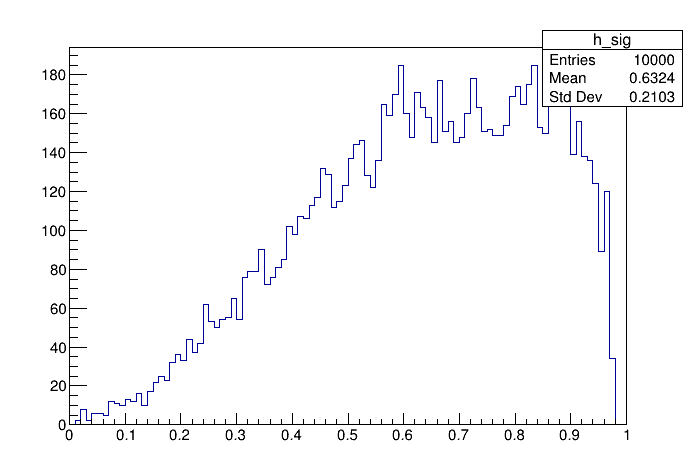

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [10]:
h1->Draw();
gPad->Draw();

In [11]:
ROOT::RDataFrame df2("bkg_tree", inputFile);

In [12]:
auto h2 = df2.DefineSlot("DNN_Value", SofieFunctor<7, TMVA_SOFIE_Higgs_trained_model::Session>(nslots),
                            {"m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"})
                .Histo1D({"h_bkg", "", 100, 0, 1}, "DNN_Value");

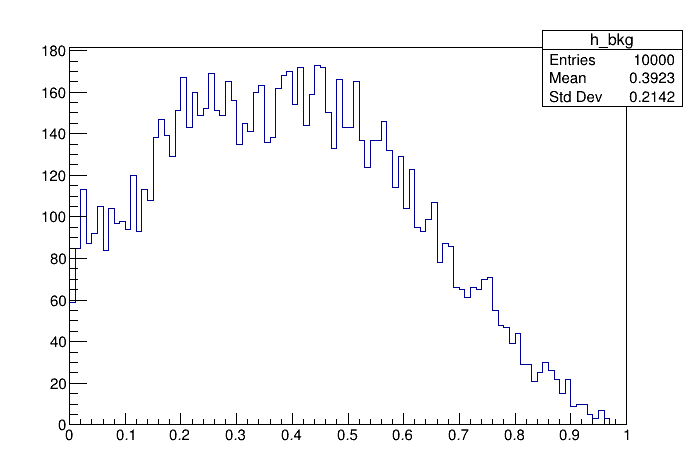

In [13]:
h2->Draw();
gPad->Draw(); 

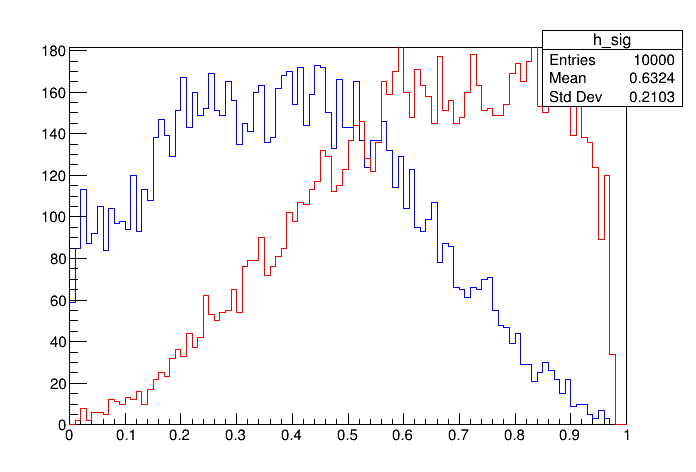

In [14]:
c1 = new TCanvas();
h1->SetLineColor(kRed);
h2->SetLineColor(kBlue);
h2->Draw();
h1->Draw("SAME");
c1->Draw();